In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import pandas as pd
import os
import numpy as np
import pickle as pk
import sklearn as sk


In [26]:
data = pd.read_csv("./../codes/semantic.csv")
data.dropna()
data.head()
print( tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [27]:
tf.random.set_seed(12)
tf.keras.backend.clear_session()
x = data.iloc[0:, 0:32].values.astype("float64").reshape(-1,2,16,1)
y = data.iloc[0:, 32].values.astype("bool")

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,
                                                    shuffle=True)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu', input_shape=(2, 16)),
    Dropout(0.2),
    Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [28]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=60)

Epoch 1/60
6567/6567 [==============================] - 6s 815us/step - loss: 0.6177 - accuracy: 0.6451 - val_loss: 0.6037 - val_accuracy: 0.6565
Epoch 2/60
6567/6567 [==============================] - 5s 795us/step - loss: 0.6054 - accuracy: 0.6555 - val_loss: 0.5969 - val_accuracy: 0.6669
Epoch 3/60
6567/6567 [==============================] - 5s 772us/step - loss: 0.6002 - accuracy: 0.6598 - val_loss: 0.5918 - val_accuracy: 0.6666
Epoch 4/60
6567/6567 [==============================] - 5s 782us/step - loss: 0.5969 - accuracy: 0.6647 - val_loss: 0.5888 - val_accuracy: 0.6656
Epoch 5/60
6567/6567 [==============================] - 5s 790us/step - loss: 0.5920 - accuracy: 0.6698 - val_loss: 0.5827 - val_accuracy: 0.6842
Epoch 6/60
6567/6567 [==============================] - 5s 773us/step - loss: 0.5881 - accuracy: 0.6738 - val_loss: 0.5789 - val_accuracy: 0.6869
Epoch 7/60
6567/6567 [==============================] - 5s 777us/step - loss: 0.5844 - accuracy: 0.6776 - val_loss: 0.5752 -

Epoch 57/60
6567/6567 [==============================] - 5s 788us/step - loss: 0.5244 - accuracy: 0.7290 - val_loss: 0.4916 - val_accuracy: 0.7555
Epoch 58/60
6567/6567 [==============================] - 5s 776us/step - loss: 0.5231 - accuracy: 0.7277 - val_loss: 0.4947 - val_accuracy: 0.7505
Epoch 59/60
6567/6567 [==============================] - 5s 782us/step - loss: 0.5234 - accuracy: 0.7293 - val_loss: 0.4884 - val_accuracy: 0.7581
Epoch 60/60
6567/6567 [==============================] - 5s 785us/step - loss: 0.5233 - accuracy: 0.7295 - val_loss: 0.4987 - val_accuracy: 0.7487


In [14]:

y_pred = model.evaluate(x_test,y_test)


2815/2815 [==============================] - 1s 473us/step - loss: 0.6339 - accuracy: 0.6478


2815/2815 [==============================] - 1s 362us/step
              precision    recall  f1-score   support

       False       0.75      0.74      0.75     45063
        True       0.75      0.75      0.75     44997

    accuracy                           0.75     90060
   macro avg       0.75      0.75      0.75     90060
weighted avg       0.75      0.75      0.75     90060

AUC-ROC: 0.842161582664368


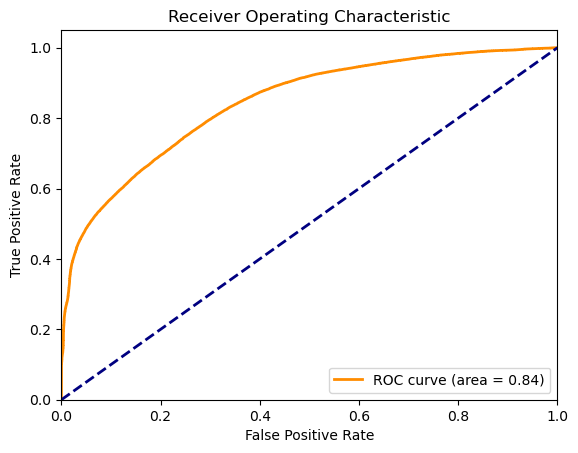

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming that 'model' is your trained model and 'X_test', 'y_test' are your test data.

# Predict the probabilities for the test data
y_pred_prob = model.predict(x_test).ravel()

# Predict the classes for the test data
y_pred = np.round(y_pred_prob)

# Print precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

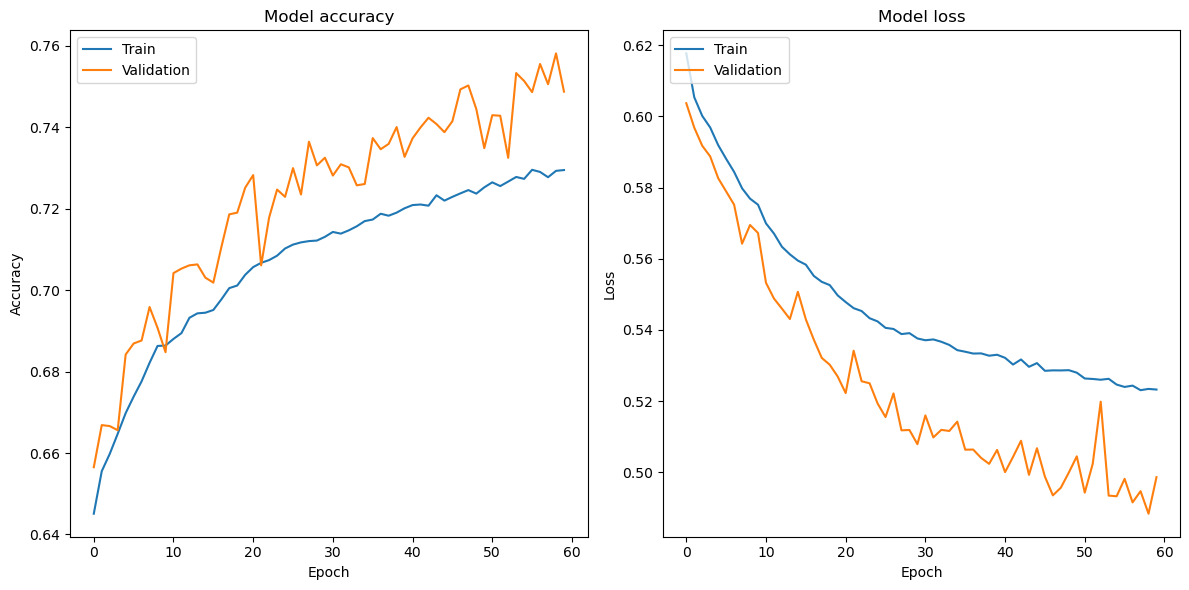

In [30]:
import matplotlib.pyplot as plt

# Assuming that 'model' is your trained model, and 'history' is the returned History object from model.fit
# e.g., history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

# Plot training & validation accuracy values
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [32]:
history.history

{'loss': [0.6177166700363159,
  0.6053882241249084,
  0.6001523733139038,
  0.5968880653381348,
  0.5919502377510071,
  0.5880828499794006,
  0.584419846534729,
  0.5798076391220093,
  0.576896071434021,
  0.5751945972442627,
  0.5699537396430969,
  0.5670921206474304,
  0.5633871555328369,
  0.5612523555755615,
  0.5594960451126099,
  0.5583524107933044,
  0.5551929473876953,
  0.5535251498222351,
  0.5526130199432373,
  0.5497128367424011,
  0.5478467345237732,
  0.5461304783821106,
  0.545325756072998,
  0.5433136820793152,
  0.5424169301986694,
  0.5406007766723633,
  0.5402907133102417,
  0.5388498902320862,
  0.5391128063201904,
  0.5376250147819519,
  0.5371158123016357,
  0.5373490452766418,
  0.5366933345794678,
  0.5358052849769592,
  0.5343391299247742,
  0.5338956117630005,
  0.5333840847015381,
  0.5334264039993286,
  0.5327762961387634,
  0.5330475568771362,
  0.5321773886680603,
  0.5302889347076416,
  0.531718373298645,
  0.5296595692634583,
  0.5306951403617859,
  0.52

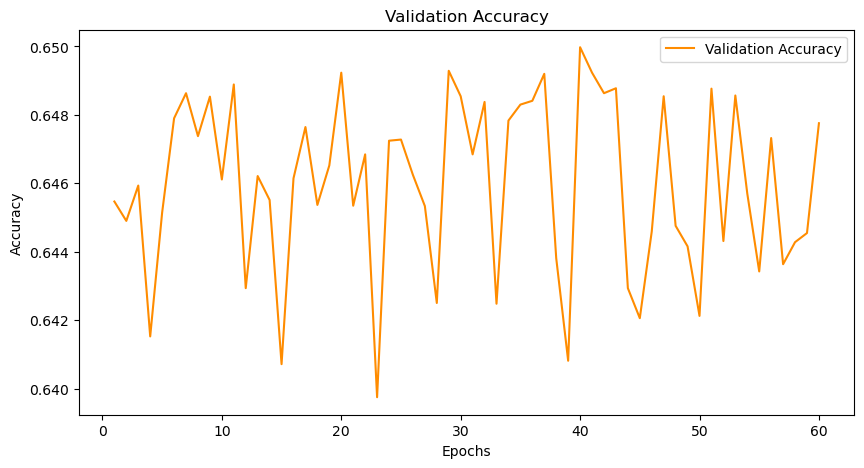

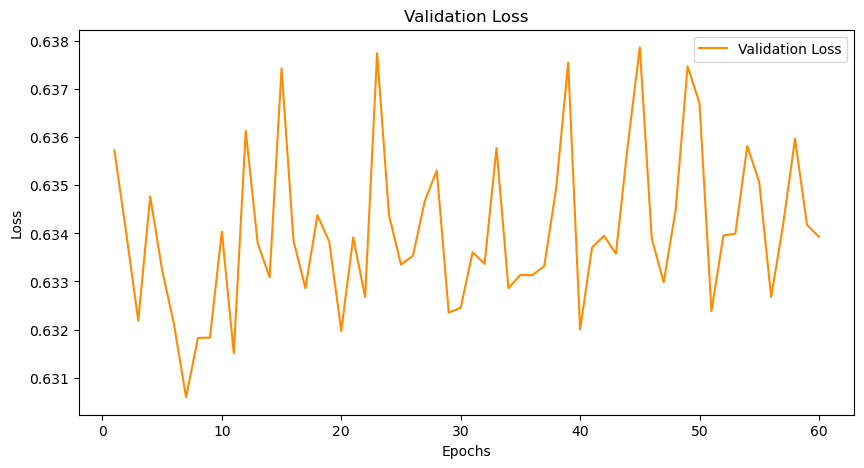

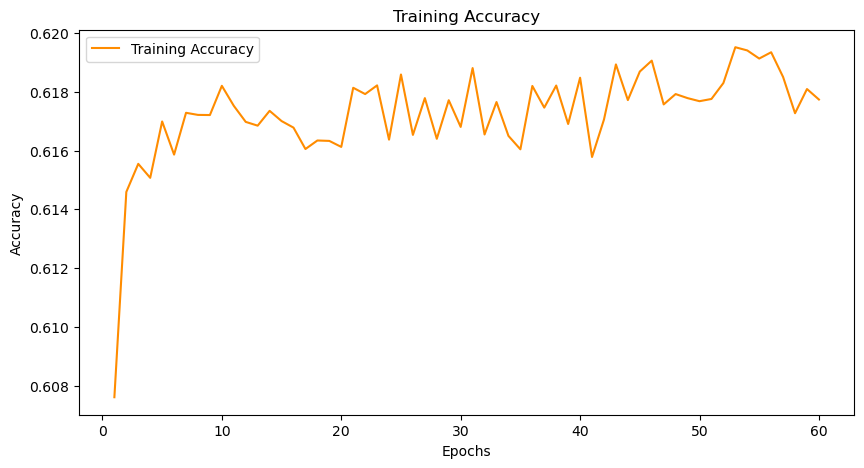

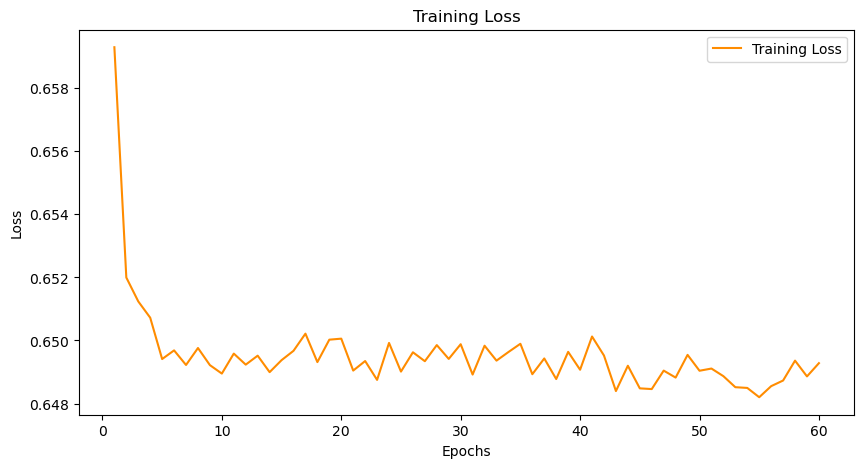

In [22]:
import matplotlib.pyplot as plt

# Extracting metrics from the history object
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

# Getting the number of epochs
num_epochs = len(validation_accuracy)

# Plotting validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), validation_accuracy, label='Validation Accuracy', color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# Plotting validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), validation_loss, label='Validation Loss', color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

# Plotting training accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_accuracy, label='Training Accuracy', color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

# Plotting training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_loss, label='Training Loss', color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()
